In [54]:
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi
import matplotlib.pyplot as mpl

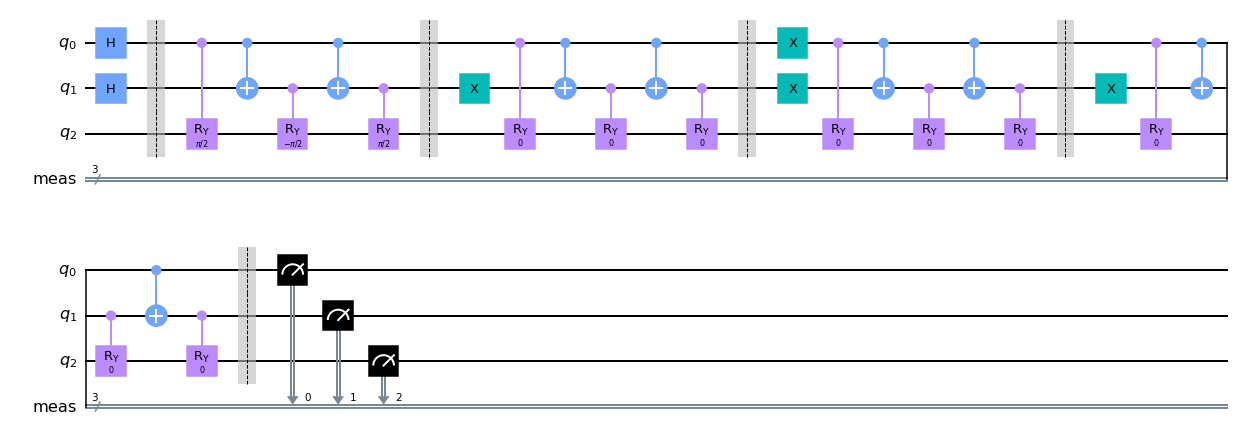

In [55]:
#INITIAL
on = pi/2 # white pixel
off = 0 # black pixel

qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()

qc.cry(on,0,2)
qc.cx(0,1)
qc.cry(-on,1,2)
qc.cx(0,1)
qc.cry(on,1,2)

qc.barrier()

qc.x(1)
qc.cry(off,0,2)
qc.cx(0,1)
qc.cry(-off,1,2)
qc.cx(0,1)
qc.cry(off,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(off,0,2)
qc.cx(0,1)
qc.cry(-off,1,2)
qc.cx(0,1)
qc.cry(off,1,2)


qc.barrier()

qc.x(1)

qc.cry(off,0,2)
qc.cx(0,1)
qc.cry(-off,1,2)
qc.cx(0,1)
qc.cry(off,1,2)

qc.measure_all()

qc.draw('mpl')

## Compressed Version of A Circuit

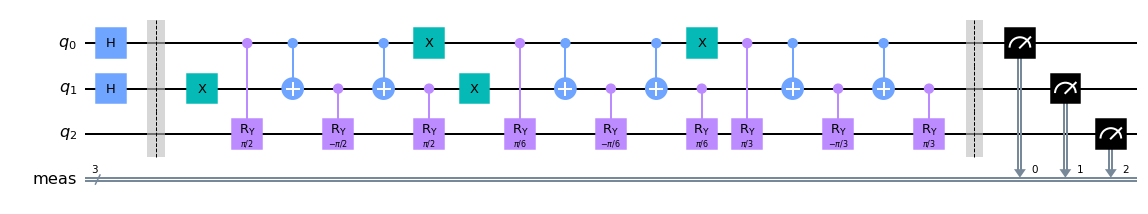

In [67]:
theta = (pi/2)/3 # pixel value 1

qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()

qc.x(1)
qc.cry(theta*3,0,2)
qc.cx(0,1)
qc.cry(-theta*3,1,2)
qc.cx(0,1)
qc.cry(theta*3,1,2)
qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)
qc.x(0)
qc.cry(theta*2,0,2)
qc.cx(0,1)
qc.cry(-theta*2,1,2)
qc.cx(0,1)
qc.cry(theta*2,1,2)

qc.measure_all()

qc.draw('mpl')

{'000': 1010, '010': 791, '011': 259, '101': 1024, '110': 270, '111': 742}


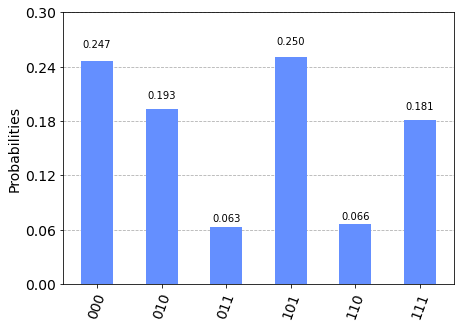

In [68]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, qasm_sim)
qobj = assemble(t_qc, shots=4096)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

[[0, 1.0], [0.2544769085768143, 0.7412587412587412]]


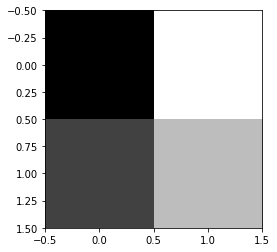

In [69]:
image=[[0, 0], [0, 0]]
count_sum=[[0, 0], [0, 0]]
for x in counts:
    if x[1:] == '00':
        count_sum[0][0]+=counts[x]
    elif x[1:] == '01':
        count_sum[0][1]+=counts[x]
    elif x[1:] == '10':
        count_sum[1][0]+=counts[x]
    elif x[1:] == '11':
        count_sum[1][1]+=counts[x]

for x in counts:
    if x[0] == '1':
        image[int(x[1])][int(x[2])]=counts[x]/count_sum[int(x[1])][int(x[2])]
        
print(image)
mpl.imshow(image, cmap='gray')